# Boundary values and boundary layer formulations

In [1]:
%load_ext autoreload
%autoreload 2

import os, h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
## Configuration

### Read pre-computed eigenvalues and meridional profiles

In [80]:
with h5py.File("./runs/QGP-S2_Le2_5e-5_Lu8e+4_m3/eigen_export.h5", 'r') as fread:
    eigenvals = fread['Eigenvalues'][()]
    v_section = fread['Meridion_slices_V'][()]
    b_section = fread['Meridion_slices_B'][()]
    grids = fread['Coordinates'][()]

eigeninfo = pd.read_table("./runs/QGP-S2_Le2_5e-5_Lu8e+4_m3/eigenspectra_describe.txt", header=3, delimiter='\s+')

if len(eigenvals) == eigeninfo.shape[0]:
    eigeninfo['Calculation'] = eigenvals
else:
    display(eigenvals)
display(eigeninfo)

,Index,Value,Type,Radial-k[Us(Up-1)],Calculation
0,N0,-0.00203244-0.00044653j,unclassified_non-column,"-1,-1",-0.00203200-0.00044700j
1,N1,-0.00216212-0.00155832j,unclassified_non-column,"-1,-1",-0.00216200-0.00155800j
2,mc1,-0.00358095+0.00946888j,qs-columnar-MC,"1,1",-0.00358100+0.00946900j
3,mc2,-0.00657548+0.04837961j,columnar-MC,"2,2",-0.00657400+0.04837900j
4,mc3,-0.01149625+0.14057362j,columnar-MC,"3,3",-0.01149800+0.14057400j
5,mc4,-0.01771238+0.30952512j,columnar-MC-wv,"4,4",-0.01771100+0.30952500j
6,mc5,-0.02500126+0.57989976j,columnar-MC-wv,"5,5",-0.02500200+0.57990000j
7,mc6,-0.03387665+0.98147817j,columnar-MC-wv,"6,6",-0.03387600+0.98147800j
8,mc7,-0.04365568+1.54459877j,columnar-MC-wv,"7,7",-0.04365500+1.54459900j
9,mc8,-0.05890801+2.31010860j,columnar-MC-wv,"8,8",-0.05890800+2.31010900j



---
## Boundary evaluation


In [81]:
i_mode = 6

### Meridional slice

In [82]:
lon_deg = 15
lon_rad = np.radians(lon_deg)
m_val = 3

rr, tt = grids[0, ...], grids[1, ...]
rg, tg = rr[0, :], tt[:, 0]
X1, X2 = rr*np.sin(tt), rr*np.cos(tt)

v_sph = {
    'r': v_section[i_mode, 0, ...]*np.exp(1j*m_val*lon_rad), 
    'theta': v_section[i_mode, 1, ...]*np.exp(1j*m_val*lon_rad),
    'phi': v_section[i_mode, 2, ...]*np.exp(1j*m_val*lon_rad),
}
v_cyl = {
    's': v_sph['r']*np.sin(tt) + v_sph['theta']*np.cos(tt),
    'phi': v_sph['phi'],
    'z': v_sph['r']*np.cos(tt) - v_sph['theta']*np.sin(tt)
}
b_sph = {
    'r': b_section[i_mode, 0, ...]*np.exp(1j*m_val*lon_rad), 
    'theta': b_section[i_mode, 1, ...]*np.exp(1j*m_val*lon_rad),
    'phi': b_section[i_mode, 2, ...]*np.exp(1j*m_val*lon_rad),
}
b_cyl = {
    's': b_sph['r']*np.sin(tt) + b_sph['theta']*np.cos(tt),
    'phi': b_sph['phi'],
    'z': b_sph['r']*np.cos(tt) - b_sph['theta']*np.sin(tt)
}
fields = {
    'v_r': v_sph['r'], 'v_t': v_sph['theta'],
    'v_s': v_cyl['s'], 'v_p': v_cyl['phi'], 'v_z': v_cyl['z'],
    'b_r': b_sph['r'], 'b_t': b_sph['theta'],
    'b_s': b_cyl['s'], 'b_p': b_cyl['phi'], 'b_z': b_cyl['z'],
}

View meridional plot

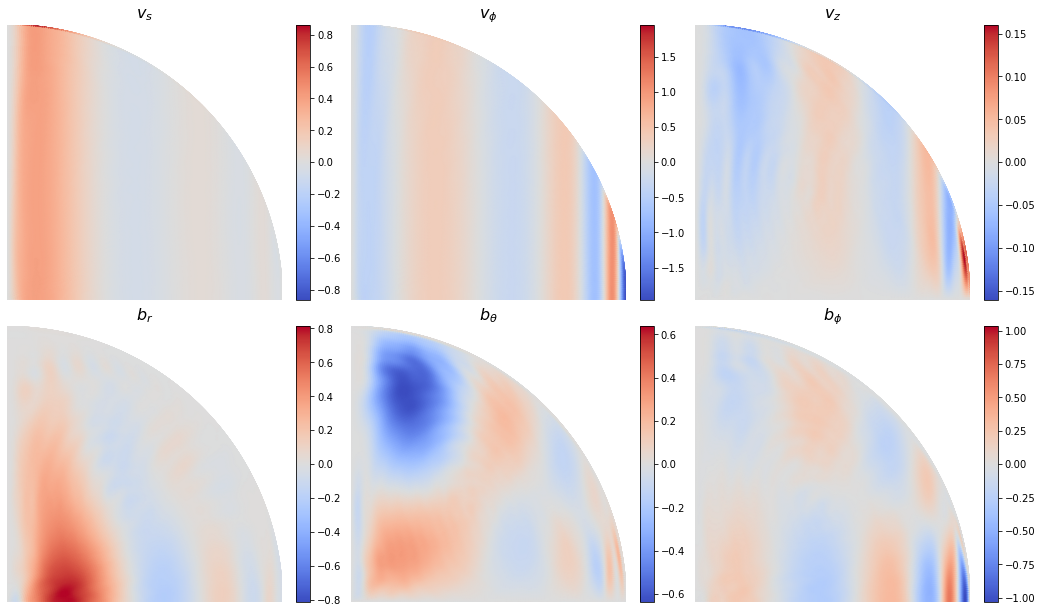

In [83]:
plot_fields = [
    ['v_s', 'v_p', 'v_z'],
    # ['v_r', 'v_t', 'v_p'],
    ["b_r", "b_t", "b_p"],
]
plot_fnames = [
    [r"$v_s$", r"$v_\phi$", r"$v_z$"],
    # [r"$v_r$", r"$v_\theta$", r"$v_\phi$"],
    [r"$b_r$", r"$b_\theta$", r"$b_\phi$"],
]

# save_name = "./runs/S1pi_Le1e-4_Lu2e+4_m1_parity_oppo/v_md_m3_i5"
save_name = None
override = False

force_symmetric_cmap = True

max_v_norm = np.abs(v_sph['r']).max()
max_b_norm = np.abs(b_sph['r']).max()

nrows, ncols = len(plot_fields), len(plot_fields[0])
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4.8, nrows*4.2), layout='constrained')
axes = np.atleast_2d(axes)

for i_r in range(nrows):
    for i_c in range(ncols):
        fname = plot_fields[i_r][i_c]
        ax = axes[i_r][i_c]
        if fname is None:
            ax.remove()
            continue
        field_plot = np.real(fields[fname])
        if np.abs(np.real(field_plot/max_v_norm)).max() > 1e-7:
            normalizer = max_v_norm
            if force_symmetric_cmap:
                climit = np.max(np.abs(field_plot/normalizer))
                # climit = np.max(np.abs(field_plot[X1 < 0.5]/normalizer))
                # if i_c == 1:
                #     climit = 1.
                cm = ax.pcolormesh(X1, X2, field_plot/normalizer, shading="gouraud", cmap="coolwarm", vmin=-climit, vmax=+climit)
                plt.colorbar(cm, ax=ax)
            else:
                cm = ax.pcolormesh(X1, X2, field_plot/normalizer, shading="gouraud", cmap="coolwarm")
                plt.colorbar(cm, ax=ax)
        else:
            cm = ax.pcolormesh(X1, X2, field_plot/max_u_norm, vmin=-1e-7, vmax=+1e-7)
            plt.colorbar(cm, ax=ax)
        
        ax.set_title(plot_fnames[i_r][i_c], fontsize=16)
        ax.set_aspect('equal', 'box')
        # ax.grid()
        ax.set_xlim([0, 1])
        ax.set_ylim([0, 1])
        ax.axis("off")

if save_name is not None:
    if os.path.exists(save_name + '.png') and not override:
        print("File exists... aborting...")
    else:
        plt.savefig(save_name + '.png', format="png", dpi=150, bbox_inches="tight")

plt.show()

### Radial profile

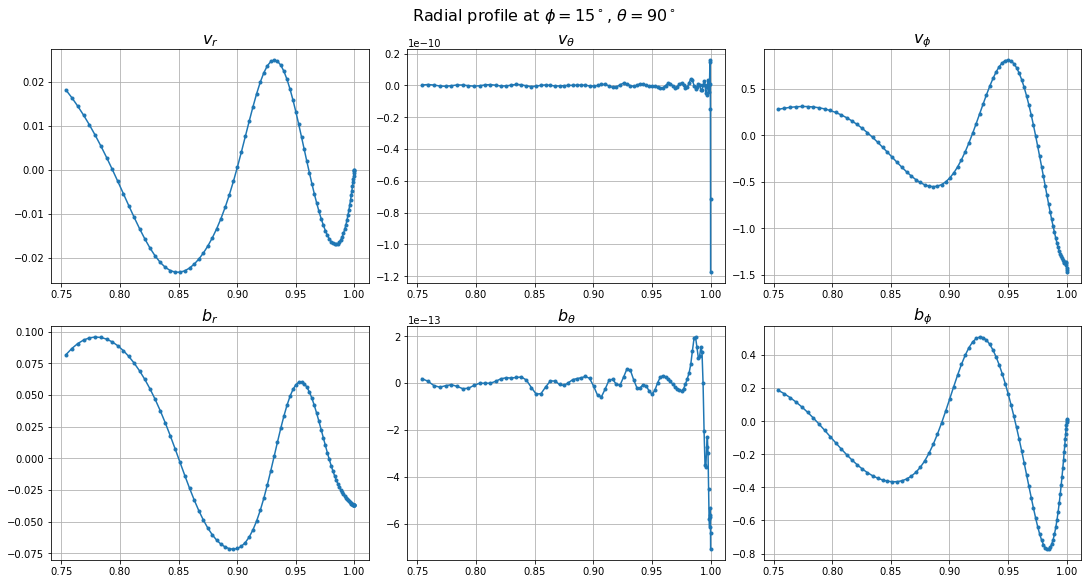

In [84]:
theta_deg = 90
i_tg = np.argmin(np.abs(np.radians(theta_deg) - tg))

r_min = 0.75
i_rg = rg > r_min

plot_fields = [
    # ["v_s", "v_p", "v_z"],
    ['v_r', 'v_t', 'v_p'],
    ["b_r", "b_t", "b_p"],
]
plot_fnames = [
    # [r"$v_s$", r"$v_\phi$", r"$v_z$"],
    [r"$v_r$", r"$v_\theta$", r"$v_\phi$"],
    [r"$b_r$", r"$b_\theta$", r"$b_\phi$"],
]

# save_name = "./runs/S1pi_Le1e-4_Lu2e+4_m1_parity_oppo/v_md_m3_i5"
save_name = None
override = False

nrows, ncols = len(plot_fields), len(plot_fields[0])
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*4), layout='constrained')
axes = np.atleast_2d(axes)

for i_r in range(nrows):
    for i_c in range(ncols):
        fname = plot_fields[i_r][i_c]
        ax = axes[i_r][i_c]
        if fname is None:
            ax.remove()
            continue
        field_plot = np.real(fields[fname][i_tg, :])
        ax.plot(rg[i_rg], field_plot[i_rg], '.-')
        ax.grid(which='both')
        ax.set_title(plot_fnames[i_r][i_c], fontsize=16)

fig.suptitle(r'Radial profile at $\phi={}^\circ$, $\theta={}^\circ$'.format(lon_deg, theta_deg), fontsize=16)

if save_name is not None:
    if os.path.exists(save_name + '.png') and not override:
        print("File exists... aborting...")
    else:
        plt.savefig(save_name + '.png', format="png", dpi=150, bbox_inches="tight")

plt.show()

### Value at the boundary

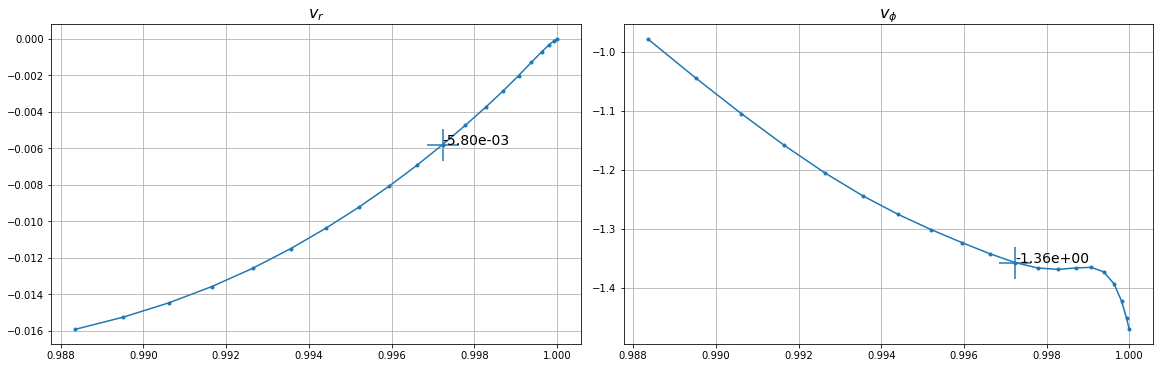

In [96]:
# Number of points considered 'within' the BL
n_use = 10

# Colatitude
theta_deg = 90
i_tg = np.argmin(np.abs(np.radians(theta_deg) - tg))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5), layout='constrained')

ax = axes[0]
ax.plot(rg[-2*n_use:], np.real(v_sph['r'][i_tg, -2*n_use:]), '.-')
ax.scatter(rg[-n_use], np.real(v_sph['r'][i_tg, -n_use]), 1000, marker='+')
ax.annotate('{:.2e}'.format(np.real(v_sph['r'][i_tg, -n_use])), (rg[-n_use], np.real(v_sph['r'][i_tg, -n_use])), fontsize=14)
ax.set_title('$v_r$', fontsize=16)
ax.grid(which='both')

ax = axes[1]
ax.plot(rg[-2*n_use:], np.real(v_sph['phi'][i_tg, -2*n_use:]), '.-')
ax.scatter(rg[-n_use], np.real(v_sph['phi'][i_tg, -n_use]), 1000, marker='+')
ax.annotate('{:.2e}'.format(np.real(v_sph['phi'][i_tg, -n_use])), (rg[-n_use], np.real(v_sph['phi'][i_tg, -n_use])), fontsize=14)
ax.set_title(r'$v_\phi$', fontsize=16)
ax.grid(which='both')

plt.show()

### Gradient at the boundary

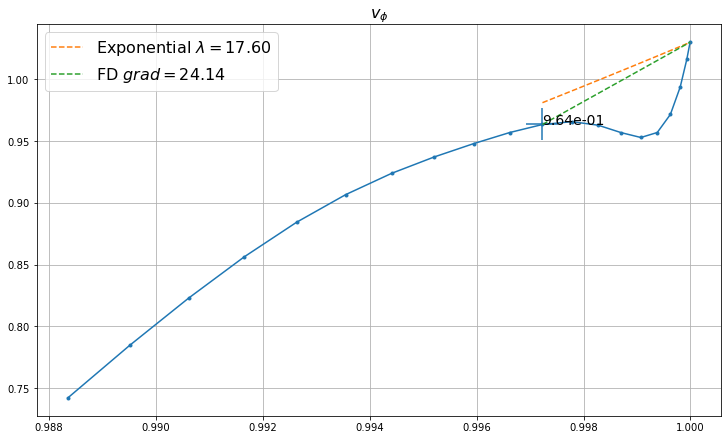

In [79]:
from sklearn.linear_model import LinearRegression

# Number of points considered 'within' the BL
n_use = 10
n_grad = 10

# Colatitude
theta_deg = 90
i_tg = np.argmin(np.abs(np.radians(theta_deg) - tg))

# Estimation of the exponent via linear regression
r_array = rg[-n_grad:]
v_array = np.real(v_sph['phi'][i_tg, -n_grad:])
v_array = v_array*np.sign(v_array[-1])
pos_vals = v_array > 0
r_array = r_array[pos_vals]
v_array = v_array[pos_vals]

regressor = LinearRegression(fit_intercept=True)
regressor.fit(np.atleast_2d(r_array).T, np.log(v_array))
exp_lambda = regressor.coef_[0]

# Estimation of the gradient via finite difference
grad = np.real(v_sph['phi'][i_tg, -1]) - np.real(v_sph['phi'][i_tg, -n_grad])
grad = grad/(rg[-1] - rg[-n_grad])


fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')

ax.plot(rg[-2*n_use:], np.real(v_sph['phi'][i_tg, -2*n_use:]), '.-')
ax.plot(rg[-n_use:], np.real(v_sph['phi'][i_tg, -1])*np.exp(exp_lambda*(rg[-n_use:] - 1)), '--', label='Exponential $\lambda={:.2f}$'.format(exp_lambda))
ax.plot(rg[-n_use:], grad*(rg[-n_use:] - rg[-1]) + np.real(v_sph['phi'][i_tg, -1]), '--', label='FD $grad={:.2f}$'.format(grad))
ax.scatter(rg[-n_use], np.real(v_sph['phi'][i_tg, -n_use]), 1000, marker='+')
ax.annotate('{:.2e}'.format(np.real(v_sph['phi'][i_tg, -n_use])), (rg[-n_use], np.real(v_sph['phi'][i_tg, -n_use])), fontsize=14)
ax.set_title(r'$v_\phi$', fontsize=16)
ax.grid(which='both')
ax.legend(fontsize=16)

plt.show()